## **COMP4082 - Autonomous Robotic Systems**
---

**Student Name:** Anshali Manoharan

**Student ID:** 20506330

---

## A Novel Version of the GA-MSM (Genetic Algorithm with Multi-Step Mutation), GA-MSM-P (Genetic Algorithm with Multi-Step Mutation and Preservation)

### Summary of Findings

- **Observation**: In the original Genetic Algorithm with Multi-Step Mutation (GA-MSM), when a new population was created, evolutionary progress was discarded in favor of a diversity-based fitness measure, leading to a drop in fitness.
  
- **Problem**: Elites selected based on diversity were mutated and crossed over, but they often did not perform well in the environment, resulting in reduced fitness.

- **Solution**: A modified approach, GA-MSM-P was implemented:
  - The new population was created using elites from the original mutated population.
  - Elites selected based on diversity were preserved.
  - This ensured both diversity and the retention of evolutionary progress.

- **Results**: 
  - Both versions were run 10 times, and median fitness scores were compared.
  - The modified version showed statistically better performance.


<i>This notebook will carry out the necessary experimentation and analysis required to show the statistical significance between the original and novel version of the algorithm.</i>


---

#### Part 1: Install all necessary dependencies
- This part installs the necessary Python libraries: `gymnasium`, `tensorflow`, `colorednoise`, `matplotlib`, `numpy`, and `uuid`.
- The `os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'` suppresses TensorFlow logs for CPU optimization messages to reduce unnecessary output.

---


In [1]:
!pip install gymnasium tensorflow matplotlib numpy uuid prettytable scipy

Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: cm-create-image master has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of cm-create-image or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 22.0.4 -> 24.0
[notice] To update, run: python3 -m pip install --upgrade pip


In [2]:
import os

# The code execution occurred on a CPU.
# As a result, TensorFlow logs related to optimizations for CPU architecture
# (e.g., AVX2, FMA) were suppressed.

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

#### Part 2. All necessary imports
- Imports standard libraries such as `numpy`, `random`, and `matplotlib` for numerical computations, random processes, and plotting.
- Imports TensorFlow's `keras` submodules for deep learning functionalities.
- `gymnasium` is imported to work with reinforcement learning environments.
- Additional modules like `joblib`, `uuid`, `time` and `prettytable` are included for parallel processing, unique ID creation for the models created during parallel processing, time-related operations and data visualisation.
- Custom modules (`populationGenerator`, `crossOverOperator`, `fitnessOperators`, `GAMSM`, and `graphResults`) are imported for the genetic algorithms and related operations.


In [3]:
import numpy as np
import random
from tensorflow.keras import layers, models
import gymnasium as gym
import matplotlib.pyplot as plt
from joblib import Parallel, delayed
import random
import copy
import tensorflow as tf
import time
import uuid
from prettytable import PrettyTable
from scipy.stats import mannwhitneyu

from population_generator import populationGenerator
from crossover_operator import crossOverOperator
from fitness_operators import fitnessOperators
from graph_results import graphResults

#### Part 3. Setting hyperparameters
- Defines hyperparameters used by the GA-MSM algorithm:
  - `number_of_additional_mutations`: Specifies how many additional mutations occur per generation, based on the Core Paper A.
  - `population_number`: Total population size for the genetic algorithm.
  - `elite_percentage`: Top percentage of the population to be considered elite, based on Core Paper A
  - `noise_type`: Gaussian noise is applied to both versions of the algorithms, as it is the default
  - `number_of_generations`: The number of generations for the algorithm to run, with 200 chosen based on convergence trends from Core Paper A
  - `number_of_runs`: The total number of times the algorithm should be run when a different configuration is implemented.

In [4]:
number_of_additional_mutations = 10
population_number = 100
elite_percentage = 0.1
noise_type = "gaussian"
number_of_generations = 200
number_of_runs = 10

#### Part 4. Implementing GA-MSM

- This part executes the GA-MSM algorithm by creating an instance of the `GAMSM` class with the specified hyperparameters: the number of additional mutations, population size, elite percentage, noise type, and the number of generations.
- 10 runs of GA-MSM are carried out. For each generation in each run, the average score of the entire population is recorded. At the end of the 10 runs, the median across generations is calculated and displayed.



In [5]:
from GA_MSM_algorithm import GAMSM

all_run_data_1 = []

start_time = time.time()

# 10 runs are performed
for i in range(number_of_runs):

    print("Run Number: ", i+1)
    GA_MSM_with_Gaussian_noise = GAMSM(number_of_additional_mutations, population_number, elite_percentage, noise_type, number_of_generations, 1)
    GA_MSM_with_Gaussian_noise.run() # results stores average of each generation - 200 average scores stored
    all_run_data_1.append(GA_MSM_with_Gaussian_noise.average_population_fitness)

end_time = time.time()

total_time = end_time - start_time
hours, minutes = divmod(total_time // 60, 60)
print(f"\nOverall Runtime: {int(hours)} hours and {int(minutes)} minutes.")

Run Number:  1
Total Runtime: 0 hours and 4 minutes.
Run Number:  2
Total Runtime: 0 hours and 4 minutes.
Run Number:  3
Total Runtime: 0 hours and 5 minutes.
Run Number:  4
Total Runtime: 0 hours and 4 minutes.
Run Number:  5
Total Runtime: 0 hours and 4 minutes.
Run Number:  6
Total Runtime: 0 hours and 4 minutes.
Run Number:  7
Total Runtime: 0 hours and 5 minutes.
Run Number:  8
Total Runtime: 0 hours and 3 minutes.
Run Number:  9
Total Runtime: 0 hours and 4 minutes.
Run Number:  10
Total Runtime: 0 hours and 4 minutes.

Overall Runtime: 0 hours and 45 minutes.


#### Part 6. Implementing GA-MSM-P
- The novel version of the algorithm is tested in the same manner.

In [6]:
from GA_MSM_P_algorithm import GAMSM_P

all_run_data_2 = []

start_time = time.time()

# 10 runs are performed
for i in range(number_of_runs):

    print("Run Number: ", i+1)
    GA_MSMP_with_Gaussian_noise = GAMSM_P(number_of_additional_mutations, population_number, elite_percentage, noise_type, number_of_generations, 1)
    GA_MSMP_with_Gaussian_noise.run() # results stores average of each generation - 200 average scores stored
    all_run_data_2.append(GA_MSMP_with_Gaussian_noise.average_population_fitness)

end_time = time.time()

total_time = end_time - start_time
hours, minutes = divmod(total_time // 60, 60)
print(f"\nOverall Runtime: {int(hours)} hours and {int(minutes)} minutes.")

Run Number:  1
Total Runtime: 0 hours and 2 minutes.
Run Number:  2
Total Runtime: 0 hours and 4 minutes.
Run Number:  3
Total Runtime: 0 hours and 3 minutes.
Run Number:  4
Total Runtime: 0 hours and 4 minutes.
Run Number:  5
Total Runtime: 0 hours and 3 minutes.
Run Number:  6
Total Runtime: 0 hours and 4 minutes.
Run Number:  7
Total Runtime: 0 hours and 4 minutes.
Run Number:  8
Total Runtime: 0 hours and 4 minutes.
Run Number:  9
Total Runtime: 0 hours and 4 minutes.
Run Number:  10
Total Runtime: 0 hours and 3 minutes.

Overall Runtime: 0 hours and 40 minutes.


In [7]:
import pandas as pd
df1 = pd.DataFrame(all_run_data_1)
df2 = pd.DataFrame(all_run_data_2)

with pd.ExcelWriter('novelty.xlsx', engine='openpyxl') as writer:
    df1.to_excel(writer, sheet_name='Sheet1', index=False, header=False)  # Writing array1 to 'Sheet1'
    df2.to_excel(writer, sheet_name='Sheet2', index=False, header=False)  # Writing array2 to 'Sheet2'

#### Part 5. Calculating Results for GA-MSM and GA-MSM-P

- the medians of each generation across the 10 runs is calculated.
- these median scores will be used for calculating statistical significance.

In [8]:
# calculating medians
import pandas as pd

all_run_data_1 = pd.read_excel('novelty.xlsx', sheet_name='Sheet1', header=None)
all_run_data_2 = pd.read_excel('novelty.xlsx', sheet_name='Sheet2', header=None)

median_array = []
final_data1 = []
final_data2 = []

# GA-MSM
for gen in range(number_of_generations):
    for run_number in range(number_of_runs):
         median_array.append(all_run_data_1[gen][run_number])
    final_data1.append(np.median(median_array))
    median_array = []

median_array = []

# GA-MSM-P
for gen in range(number_of_generations):
    for run_number in range(number_of_runs):
         median_array.append(all_run_data_2[gen][run_number])
    final_data2.append(np.median(median_array))
    median_array = []


#### Part 5: Displaying Results

Both algorithm's median scores across 200 generations in 10 runs is displayed below, in the form of a table, and plotted in a line graph.


In [9]:
from prettytable import PrettyTable

table = PrettyTable()

print("Median Scores per Generation across 10 Runs")

table.field_names = ["Generation Number", "Median Scores - GA-MSM", "Median Scores - GA-MSM-P"]

for i in range(200):
    table.add_row([i + 1, round(final_data1[i],2), round(final_data2[i],2)])

print(table)


Median Scores per Generation across 10 Runs
+-------------------+------------------------+--------------------------+
| Generation Number | Median Scores - GA-MSM | Median Scores - GA-MSM-P |
+-------------------+------------------------+--------------------------+
|         1         |          0.0           |           0.0            |
|         2         |          0.0           |           0.0            |
|         3         |          0.0           |           0.0            |
|         4         |          0.0           |           0.01           |
|         5         |          0.0           |           0.01           |
|         6         |          0.01          |           0.01           |
|         7         |          0.01          |           0.02           |
|         8         |          0.01          |           0.02           |
|         9         |          0.02          |           0.02           |
|         10        |          0.02          |           0.02       

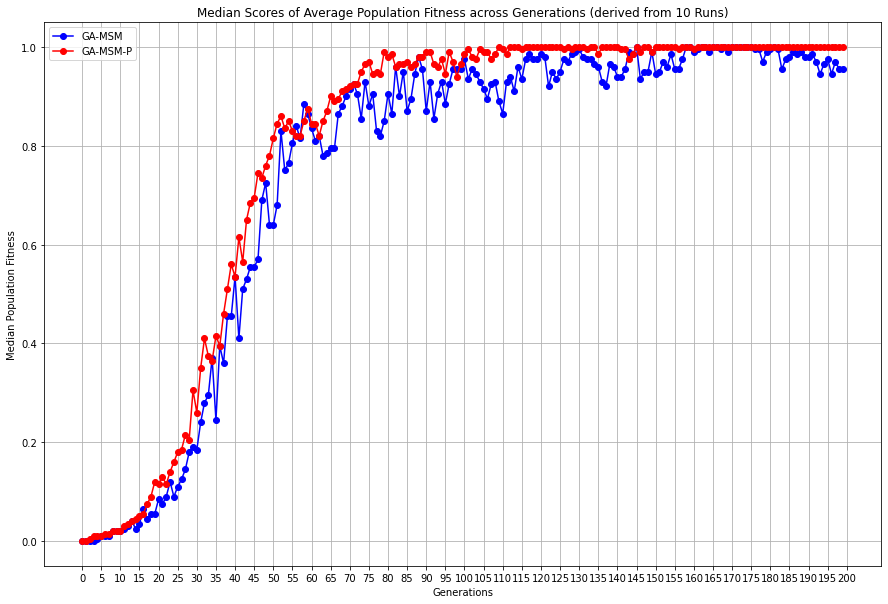

In [10]:
graphResults.display_double_results(number_of_generations, "Generations", "Median Population Fitness", "Median Scores of Average Population Fitness across Generations (derived from 10 Runs)",final_data1 ,final_data2 )

#### Part 7: Mann-Whitney U Test

- checks if GA-MSM-P performs statistically significantly better than GA-MSM.


In [11]:
stat, p_value = mannwhitneyu(final_data1, final_data2)

print("Mann Whitney U Statistical Test Results")
print(f"Test Statistic: {stat}")
print(f"P-value: {p_value}")

alpha = 0.01
if p_value < alpha:
    print("The difference between the algorithms is statistically significant.")
else:
    print("There is no statistically significant difference between the algorithms.")


Mann Whitney U Statistical Test Results
Test Statistic: 14274.5
P-value: 6.290748700362808e-07
The difference between the algorithms is statistically significant.
